In [10]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load pre-trained DeepLabV3 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()
print("Deep Learning Model ready for inference")

Using cache found in C:\Users\Elmaddin/.cache\torch\hub\pytorch_vision_v0.10.0


Deep Learning Model ready for inference


In [12]:
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)
    return image

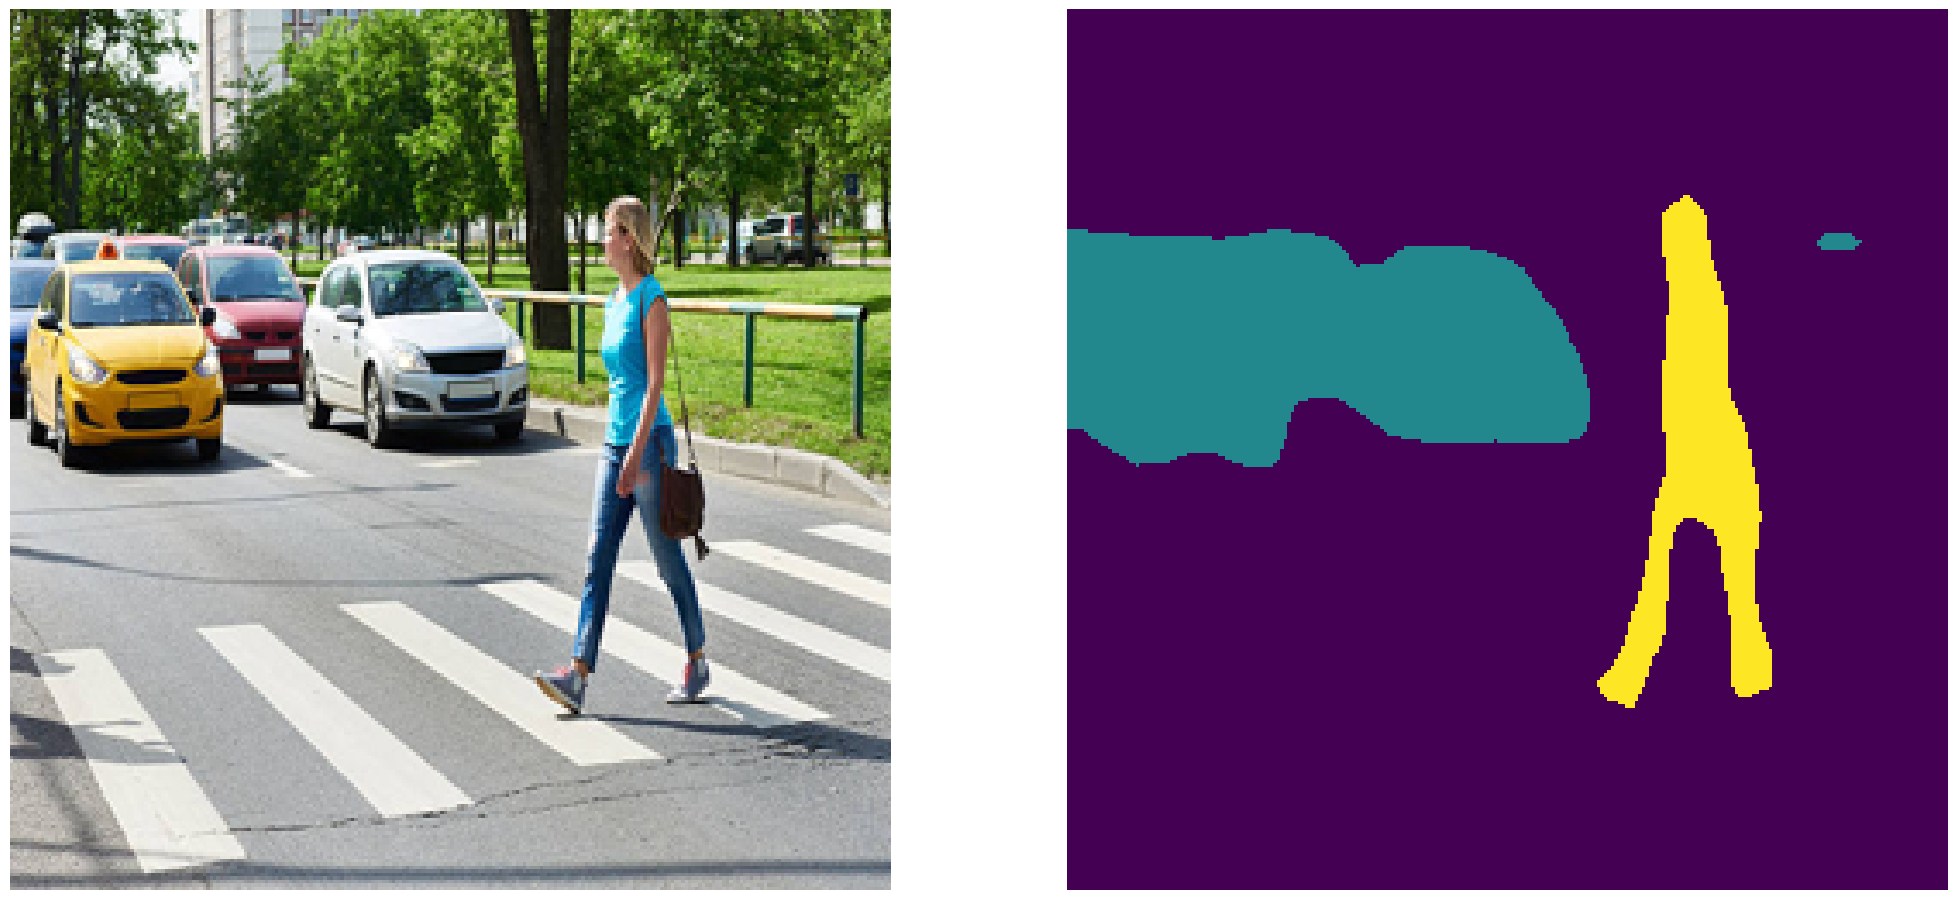

In [13]:
image_used = preprocess_image('carss.jpg')
with torch.no_grad():
    output = model(image_used
    )['out'][0]
output_predictions = torch.argmax(output, dim=0).cpu().numpy()

plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1)
plt.imshow(Image.open("carss.jpg").resize((256, 256)))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(output_predictions)
plt.axis('off')
plt.show()

In [14]:
import cv2

image = cv2.imread('carss.jpg', 0)
_, thresholded_image = cv2.threshold(image, 124, 178, cv2.THRESH_BINARY)
cv2.imshow('Thresholded Image', thresholded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
_, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('Otsu Thresholded Image', otsu_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

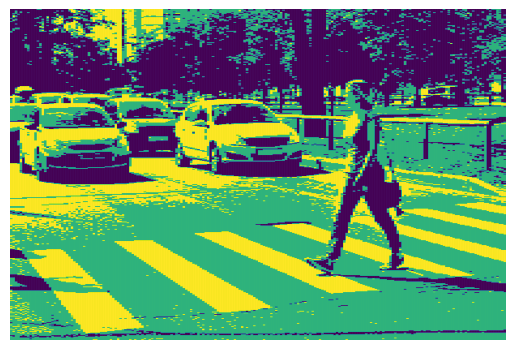

In [16]:
twoDimage = image.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(twoDimage, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((image.shape))
plt.axis('off')
plt.imshow(result_image, "viridis")

In [17]:
image = cv2.imread("carss.jpg")
lower_bound = np.array([0, 0, 0])
upper_bound = np.array([25, 255, 255])

mask = cv2.inRange(image, lower_bound, upper_bound)
masked_image = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow('Color Masked Image', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
edges = cv2.Canny(image, 100, 200)

cv2.imshow('Edge Detected Image', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()